In [51]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import csv


import sys
import os
import geopandas as gpd
import pycountry
from shapely.geometry import Polygon

In [52]:
roadQualityFileName = 'roadQuality2019.csv'
causalityFileName = "IRTAD_CASUAL_BY_AGE.csv" 
attitudesFileName = "esra.xlsx"
AccidentTypeFileName = "AccidentsByType.csv"

## Road quality dataset

Data set die handelt over de wegkwaliteit in Europe


In [53]:
# Read CSV file using Pandas
roadQualityData = pd.read_csv(roadQualityFileName)

roadQualityData

,Country,RoadQuality,Ranking
0,Netherlands,6.4,1
1,Switzerland,6.3,2
2,Austria,6.0,3
3,Portugal,6.0,4
4,Spain,5.7,5
5,Croatia,5.6,6
6,Denmark,5.6,7
7,Luxembourg,5.5,8
8,France,5.4,9
9,Finland,5.3,10


## Causality data

Deze data handelt alle data over de accidenten

In [80]:
european_countries = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 
                      'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 
                      'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 
                      'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 
                      'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 
                      'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
                      'Ukraine', 'United Kingdom', 'Vatican City']

#dataset
Casualitydata = pd.read_csv(causalityFileName)
#Casualitydata
accidentsDataTemp = Casualitydata[Casualitydata["TRAFFIC_PARTICIPATION"] == "TOT"][Casualitydata["AGE_GROUP"]== "TOT"][Casualitydata["Year"] == 2019][Casualitydata["MEASURE"] == "RATE-POP-100T"]
#accidentsDataTemp
accidentsData = accidentsDataTemp[['Country', 'Value']] 
# Define a list of European countries

accidentsData = accidentsData[accidentsData['Country'].isin(european_countries)]
accidentsData

/tmp/ipykernel_6697/1119674398.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accidentsDataTemp = Casualitydata[Casualitydata["TRAFFIC_PARTICIPATION"] == "TOT"][Casualitydata["AGE_GROUP"]== "TOT"][Casualitydata["Year"] == 2019][Casualitydata["MEASURE"] == "RATE-POP-100T"]
/tmp/ipykernel_6697/1119674398.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accidentsDataTemp = Casualitydata[Casualitydata["TRAFFIC_PARTICIPATION"] == "TOT"][Casualitydata["AGE_GROUP"]== "TOT"][Casualitydata["Year"] == 2019][Casualitydata["MEASURE"] == "RATE-POP-100T"]
/tmp/ipykernel_6697/1119674398.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accidentsDataTemp = Casualitydata[Casualitydata["TRAFFIC_PARTICIPATION"] == "TOT"][Casualitydata["AGE_GROUP"]== "TOT"][Casualitydata["Year"] == 2019][Casualitydata["MEASURE"] == "RATE-POP-100T"]


,Country,Value
669,Austria,4.695909
1181,Belgium,5.621744
2201,Czech Republic,5.793536
2713,Denmark,3.427441
3225,Finland,3.823905
3737,France,5.005242
4240,Germany,3.669030
4738,Greece,6.415158
5243,Hungary,6.159982
5755,Iceland,1.680715


In [81]:
# Renaming the database and combining them
roadQualityData.rename(columns={"Ranking" : "RankingQuality"}, inplace=True)

accidentsData.rename(columns={"Value" : "Cas"}, inplace=True)
#Rename to UK
#TrafficDataset.loc[TrafficDataset['Country'] == 'Croatia', 'Cas'] = (297/4130304) * 100000
accidentsData.loc[accidentsData['Country'] == "United Kingdom", 'Country'] = "UK"
accidentsData

,Country,Cas
669,Austria,4.695909
1181,Belgium,5.621744
2201,Czech Republic,5.793536
2713,Denmark,3.427441
3225,Finland,3.823905
3737,France,5.005242
4240,Germany,3.669030
4738,Greece,6.415158
5243,Hungary,6.159982
5755,Iceland,1.680715


In [86]:
#merging the datasets
TrafficDataset = pd.merge(roadQualityData, accidentsData, on='Country', how='outer')
TrafficDataset

#Netherlands casuality 661, population: 17,097,130 
TrafficDataset.loc[TrafficDataset['Country'] == 'Netherlands', 'Cas'] = (661/17097130) *100000
#Croatia casuality  297, population :4,130,304
TrafficDataset.loc[TrafficDataset['Country'] == 'Croatia', 'Cas'] = (297/4130304) * 100000
#Cyprus casuality
TrafficDataset.loc[TrafficDataset['Country'] == 'Cyprus', 'Cas'] = 5.9
#Turkey casuality 5,473, population: 83,429,615
TrafficDataset.loc[TrafficDataset['Country'] == 'Turkey', 'Cas'] = (5473/83429615) *100000
#Estonia
TrafficDataset.loc[TrafficDataset['Country'] == 'Estonia', 'Cas'] = 3.9
#Slovakai
TrafficDataset.loc[TrafficDataset['Country'] == 'Slovakai', 'Cas'] = 5.1
#Albania  1498, population: 2,880,917
TrafficDataset.loc[TrafficDataset['Country'] == 'Albania', 'Cas'] = 8.0
#Slovakia
TrafficDataset.loc[TrafficDataset['Country'] == 'Slovakia', 'Cas'] = 5.6
#Czechia
TrafficDataset.loc[TrafficDataset['Country'] == 'Czechia', 'Cas'] = 5.8
#Montenegro
TrafficDataset.loc[TrafficDataset['Country'] == 'Montenegro', 'Cas'] = 7.6
#Latvia
TrafficDataset.loc[TrafficDataset['Country'] == 'Latvia', 'Cas'] = 6.9
#Russia

#Bulgaria
TrafficDataset.loc[TrafficDataset['Country'] == 'Bulgaria', 'Cas'] = 5.5
#North Macedonië
TrafficDataset.loc[TrafficDataset['Country'] == 'North Macedonia', 'Cas'] = 6.4
#Malta
TrafficDataset.loc[TrafficDataset['Country'] == 'Malta', 'Cas'] = 3.2
#Romania
TrafficDataset.loc[TrafficDataset['Country'] == 'Romania', 'Cas'] = 9.6
#Ukraine
TrafficDataset.loc[TrafficDataset['Country'] == 'Ukraine', 'Cas'] = 8.3
#Bosnia & Herz.
TrafficDataset.loc[TrafficDataset['Country'] == 'Bosnia & Herz.', 'Cas'] = 7.8
#Moldova
TrafficDataset.loc[TrafficDataset['Country'] == 'Moldova', 'Cas'] = 10.4

TrafficDataset

,Country,RoadQuality,RankingQuality,Cas
0,Netherlands,6.4,1.0,3.866146
1,Switzerland,6.3,2.0,2.188535
2,Austria,6.0,3.0,4.695909
3,Portugal,6.0,4.0,6.646156
4,Spain,5.7,5.0,3.739050
5,Croatia,5.6,6.0,7.190754
6,Denmark,5.6,7.0,3.427441
7,Luxembourg,5.5,8.0,3.583681
8,France,5.4,9.0,5.005242
9,Finland,5.3,10.0,3.823905


<Axes: xlabel='RoadQuality', ylabel='Cas'>

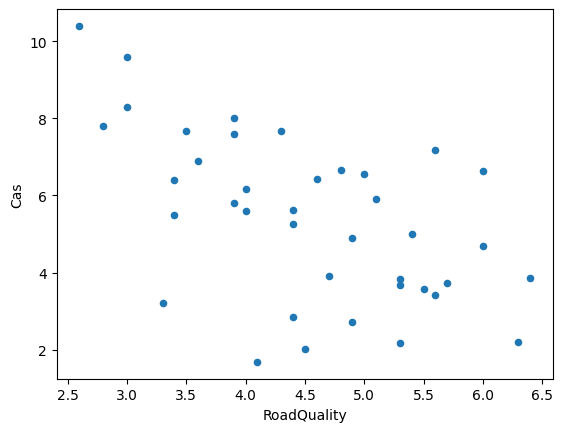

In [87]:
TrafficDataset.plot.scatter(x='RoadQuality', y='Cas')

# Bronnen

https://www.cbs.nl/nl-nl/nieuws/2020/16/meer-twintigers-en-dertigers-omgekomen-in-verkeer-in-2019
https://www.worldometers.info/world-population/netherlands-population/
https://road-safety.transport.ec.europa.eu/system/files/2021-09/erso-country-overview-2021-croatia_en.pdf
https://ec.europa.eu/commission/presscorner/detail/en/qanda_20_1004

https://unece.org/sites/default/files/2022-01/2113621_E_pdf_web.pdf